Lista Prática 3 - Pablo Corrêa Fonseca

In [42]:
library(xts)

Exercício 1: <br>

Considere os seguintes ativos, referentes a ações de empresas dos subsetores de
Agropecuária e Alimentos processados negociadas na Bovespa:
- AGRO3 = BRASILAGRO ON (Agropecuária).
- SLCE3 = SLC AGRICOLA ON (Agropecuária).
- BEEF3 = MINERVA ON (Alimentos processados/Carnes e derivados).
- BRFS3 = BRF SA ON (Alimentos processados/Carnes e derivados).
- JBSS3 = JBS ON (Alimentos processados/Carnes e derivados).
- MRFG3 = MARFRIG ON (Alimentos processados/Carnes e derivados).

**(1) Importe para o R os dados do arquivo “bovespa_01.csv”, com os preços de fechamento
de cada ativo, crie os respectivos logaritmos e converta para séries de tempo usando o
comando “ts”.**

In [3]:
dados = read.csv('bovespa_01.csv', sep=';')
dados = transform(dados, X = as.Date(as.character(X), "%Y%m%d"))
dados = xts(dados[0:-1], dados$X) /100
dados = log(dados)
head(dados)

              AGRO3    SLCE3    BEEF3    BRFS3    JBSS3    MRFG3
2015-01-02 2.157559 2.610070 2.249184 4.130033 2.358965 1.733424
2015-01-05 2.163323 2.610070 2.208274 4.110874 2.364620 1.652497
2015-01-06 2.179287 2.621766 2.187174 4.119850 2.342767 1.633154
2015-01-07 2.179287 2.653242 2.246015 4.163560 2.364620 1.669592
2015-01-08 2.163323 2.656055 2.240710 4.145513 2.370244 1.695616
2015-01-09 2.167910 2.646175 2.227862 4.123580 2.344686 1.704748

<hr>

**(2) Gere gráficos de cada série. Comente sobre a possível estacionariedade ou não-estacionariedade dos processos geradores subjacentes.**

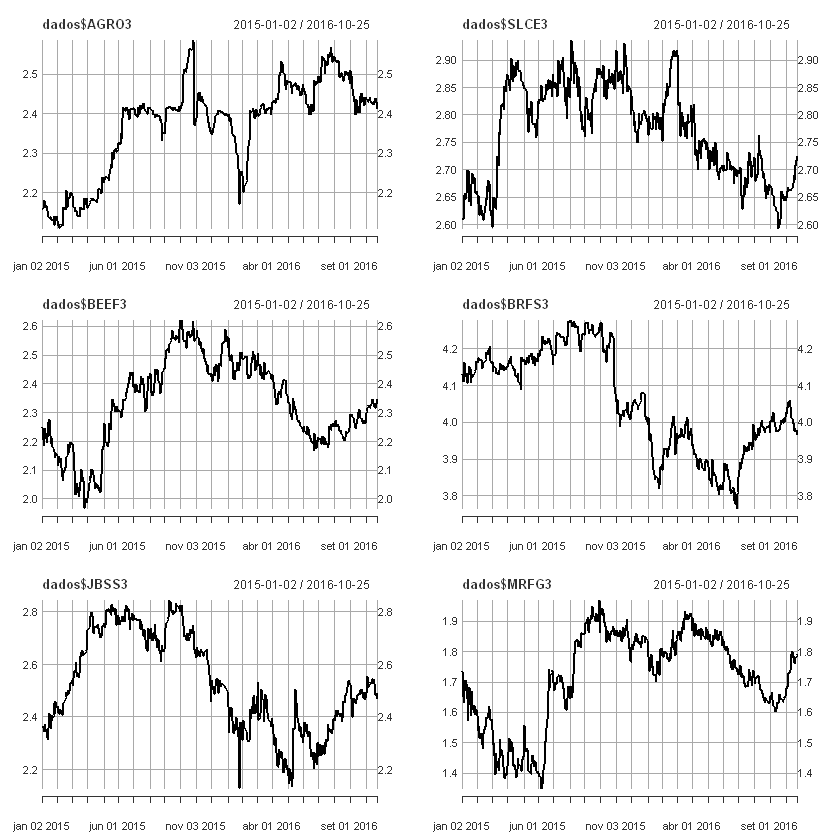

In [4]:
op = par(mfrow=c(3,2))
plot.xts(dados$AGRO3)
plot.xts(dados$SLCE3)
plot.xts(dados$BEEF3)
plot.xts(dados$BRFS3)
plot.xts(dados$JBSS3)
plot.xts(dados$MRFG3)

Pela análise dos gráficos, nota-se que nenhum dos gráficos aparenta ser estacionário em todo o intervalo de tempo. Por exemolo em BRFS3 podemos ver dois perídos estacionários separados por uma quebra estrutural no último trimestre de 2015
<hr>

**(3) Identifique a ordem de integração de cada série, por meio de testes de raiz unitária do tipo ADF para cada série logarítmica em nível e em primeira diferença.**

Valores Críticos Assintóticos do Teste ADF e do teste Z-tau de Phillips-Perron a 5%:
- Equação sem constante/tendência: -1,95
- Equação com constante: -2,86
- Equação com constante e tendência -3,41

In [5]:
library('urca')

Testes ADF em Nível

In [6]:
ci = c(none=-1.95,drift=-2.86,trend=-3.41)
print(paste('TICKER','Tipo','t','rejeita H0' ))
for (col in 1:6){
    for (type in c('none', 'drift', 'trend')){
      tr = ur.df(dados[,col], type = type, lags = 6, selectlags = "BIC")@teststat[1]
      reject_h0 = ci[type] > tr
      print(paste(colnames(dados)[col], type, round(tr,4), reject_h0 ))
}}

[1] "TICKER Tipo t rejeita H0"
[1] "AGRO3 none 0.539 FALSE"
[1] "AGRO3 drift -2.1029 FALSE"
[1] "AGRO3 trend -2.294 FALSE"
[1] "SLCE3 none 0.0738 FALSE"
[1] "SLCE3 drift -2.3657 FALSE"
[1] "SLCE3 trend -2.8203 FALSE"
[1] "BEEF3 none 0.1519 FALSE"
[1] "BEEF3 drift -1.771 FALSE"
[1] "BEEF3 trend -1.7068 FALSE"
[1] "BRFS3 none -0.4955 FALSE"
[1] "BRFS3 drift -1.303 FALSE"
[1] "BRFS3 trend -2.026 FALSE"
[1] "JBSS3 none 0.124 FALSE"
[1] "JBSS3 drift -1.5189 FALSE"
[1] "JBSS3 trend -2.413 FALSE"
[1] "MRFG3 none 0.0772 FALSE"
[1] "MRFG3 drift -1.6016 FALSE"
[1] "MRFG3 trend -1.9138 FALSE"


Testes ADF primeira diferença:

In [7]:
ci = c(none=-1.95,drift=-2.86,trend=-3.41)
print(paste('TICKER','Tipo','t','rejeita H0' ))
for (col in 1:6){
    for (type in c('none', 'drift', 'trend')){
      tr = ur.df(na.omit(diff(dados[,col])), type = type, lags = 6, selectlags = "BIC")@teststat[1]
      reject_h0 = ci[type] > tr
      print(paste(colnames(dados)[col], type, round(tr,4), reject_h0 ))
}}

[1] "TICKER Tipo t rejeita H0"
[1] "AGRO3 none -14.0979 TRUE"
[1] "AGRO3 drift -14.1052 TRUE"
[1] "AGRO3 trend -14.1258 TRUE"
[1] "SLCE3 none -17.0412 TRUE"
[1] "SLCE3 drift -17.022 TRUE"
[1] "SLCE3 trend -17.0215 TRUE"
[1] "BEEF3 none -14.4941 TRUE"
[1] "BEEF3 drift -14.4801 TRUE"
[1] "BEEF3 trend -14.4727 TRUE"
[1] "BRFS3 none -14.3194 TRUE"
[1] "BRFS3 drift -14.31 TRUE"
[1] "BRFS3 trend -14.295 TRUE"
[1] "JBSS3 none -15.3728 TRUE"
[1] "JBSS3 drift -15.3593 TRUE"
[1] "JBSS3 trend -15.3811 TRUE"
[1] "MRFG3 none -17.1253 TRUE"
[1] "MRFG3 drift -17.11 TRUE"
[1] "MRFG3 trend -17.0903 TRUE"


Com base nos testes ADF anteriores conclui-se que todas as séries possuem raíz unitária em nível, e que podemos rejeitar H0 para as séries em diferença
<hr>

**(4) Realize, para as variáveis AGRO e BEEF, também os seguintes testes de raiz unitária: Phillips-Perron (ur.pp – usando estatística “Z-tau”), DF-GLS de Elliott et al. (ur.ers), KPSS de Kwiatowski et al. (ur.kpss) e Zivot e Andrews (ur.za – considerando as possibilidades de quebra apenas no intercepto, na tendência ou ambos). Compare os resultados com aqueles obtidos pelo teste ADF. **

- Obs.1: o teste DF-GLS consiste em um teste ADF aplicado à variável “sem tendência”, obtida como o resíduo de uma regressão da variável em termos determinísticos (constante e tendência, ou apenas constante) – sob a hipótese de um erro AR(1). O teste apresenta maior potência e melhor desempenho em pequenas amostras relativamente ao teste ADF.


- Obs.2: o teste de Zivot-Andrews consiste na aplicação de testes ADF levando em consideração a possibilidade de uma quebra estrutural (no intercepto ou na tendência da regressão de teste). A hipótese nula é a presença de raiz unitária, sem quebra. A hipótese alternativa é a ausência de raiz unitária, com uma quebra. O teste é realizado para todas as possíveis datas de quebra, selecionando-se a data que minimiza a estatística-ADF. Os valores críticos do teste levam em consideração o fato de que a data de quebra é selecionada endogenamente.


- Obs.3: o teste de Kwiatowski et al. (KPSS), diferentemente dos anteriores, tem como hipótese nula a estacionariedade do processo analisado. Supõe-se que o processo possa ser escrito como a soma de um passeio aleatório e um processo estacionário (além de, possivelmente, uma tendência determinística), e testa-se a hipótese nula de que a variância do passeio aleatório é zero – o que significa que o processo analisado é estacionário em torno de uma constante (ou de uma tendência determinística).

##### Testando para AGRO 3 em Nível:

In [8]:
summary(ur.pp(dados$AGRO3, type='Z-tau'))
summary(ur.ers(dados$AGRO3, type='DF-GLS'))
summary(ur.kpss(dados$AGRO3))
summary(ur.za(dados$AGRO3, model='intercept'))
summary(ur.za(dados$AGRO3, model='trend'))
summary(ur.za(dados$AGRO3, model='both'))


################################## 
# Phillips-Perron Unit Root Test # 
################################## 

Test regression with intercept 


Call:
lm(formula = y ~ y.l1)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.146560 -0.007107 -0.000337  0.005846  0.077017 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.031558   0.015518   2.034   0.0426 *  
y.l1        0.986935   0.006533 151.059   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01665 on 447 degrees of freedom
Multiple R-squared:  0.9808,	Adjusted R-squared:  0.9807 
F-statistic: 2.282e+04 on 1 and 447 DF,  p-value: < 2.2e-16


Value of test-statistic, type: Z-tau  is: -2.0562 

         aux. Z statistics
Z-tau-mu             2.088

Critical values for Z statistics: 
                     1pct      5pct     10pct
critical values -3.447006 -2.868239 -2.570325



############################################### 
# Elliot, Rothenberg and Stock Unit Root Test # 
############################################### 

Test of type DF-GLS 
detrending of series with intercept 


Call:
lm(formula = dfgls.form, data = data.dfgls)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.147904 -0.005908  0.000171  0.006933  0.076749 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)  
yd.lag       -0.0017821  0.0035373  -0.504   0.6147  
yd.diff.lag1  0.0841913  0.0476834   1.766   0.0782 .
yd.diff.lag2  0.0113678  0.0478694   0.237   0.8124  
yd.diff.lag3 -0.0427247  0.0478248  -0.893   0.3722  
yd.diff.lag4 -0.0002386  0.0477226  -0.005   0.9960  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01675 on 440 degrees of freedom
Multiple R-squared:  0.009509,	Adjusted R-squared:  -0.001747 
F-statistic: 0.8448 on 5 and 440 DF,  p-value: 0.5185


Value of test-statistic is: -0.5038 

Crit


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 5 lags. 

Value of test-statistic is: 4.5978 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739



################################ 
# Zivot-Andrews Unit Root Test # 
################################ 


Call:
lm(formula = testmat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.141327 -0.006566 -0.000737  0.006459  0.075298 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.021e-01  2.956e-02   3.453 0.000608 ***
y.l1        9.532e-01  1.370e-02  69.550  < 2e-16 ***
trend       6.307e-06  9.411e-06   0.670 0.503070    
du          1.021e-02  3.684e-03   2.770 0.005833 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01652 on 445 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.9812,	Adjusted R-squared:  0.981 
F-statistic:  7724 on 3 and 445 DF,  p-value: < 2.2e-16


Teststatistic: -3.4181 
Critical values: 0.01= -5.34 0.05= -4.8 0.1= -4.58 

Potential break point at position: 90 



################################ 
# Zivot-Andrews Unit Root Test # 
################################ 


Call:
lm(formula = testmat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.141921 -0.006654 -0.000769  0.006641  0.075536 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.719e-02  2.670e-02   3.265  0.00118 ** 
y.l1         9.576e-01  1.289e-02  74.263  < 2e-16 ***
trend        1.388e-04  4.958e-05   2.800  0.00533 ** 
dt          -1.329e-04  5.010e-05  -2.652  0.00829 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01653 on 445 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.9811,	Adjusted R-squared:  0.981 
F-statistic:  7713 on 3 and 445 DF,  p-value: < 2.2e-16


Teststatistic: -3.2904 
Critical values: 0.01= -4.93 0.05= -4.42 0.1= -4.11 

Potential break point at position: 108 



################################ 
# Zivot-Andrews Unit Root Test # 
################################ 


Call:
lm(formula = testmat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.133322 -0.007203 -0.000660  0.005765  0.074695 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.288e-01  2.991e-02   4.305 2.05e-05 ***
y.l1         9.384e-01  1.427e-02  65.745  < 2e-16 ***
trend        1.455e-04  3.499e-05   4.159 3.84e-05 ***
du          -1.490e-02  3.667e-03  -4.064 5.71e-05 ***
dt          -1.012e-04  3.278e-05  -3.088  0.00214 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01635 on 444 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.9816,	Adjusted R-squared:  0.9814 
F-statistic:  5921 on 4 and 444 DF,  p-value: < 2.2e-16


Teststatistic: -4.3174 
Critical values: 0.01= -5.57 0.05= -5.08 0.1= -4.82 

Potential break point at position: 205 


##### Testando para AGRO3 em primeira diferença:

In [9]:
summary(ur.pp(na.omit(diff(dados$AGRO3)), type='Z-tau'))
summary(ur.ers(na.omit(diff(dados$AGRO3)), type='DF-GLS'))
summary(ur.kpss(na.omit(diff(dados$AGRO3))))
summary(ur.za(na.omit(diff(dados$AGRO3)), model='intercept'))
summary(ur.za(na.omit(diff(dados$AGRO3)), model='trend'))
summary(ur.za(na.omit(diff(dados$AGRO3)), model='both'))


################################## 
# Phillips-Perron Unit Root Test # 
################################## 

Test regression with intercept 


Call:
lm(formula = y ~ y.l1)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.149008 -0.006845 -0.000505  0.006066  0.076623 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) 0.0005052  0.0007885   0.641    0.522  
y.l1        0.0828342  0.0472007   1.755    0.080 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01668 on 446 degrees of freedom
Multiple R-squared:  0.006858,	Adjusted R-squared:  0.004631 
F-statistic:  3.08 on 1 and 446 DF,  p-value: 0.07996


Value of test-statistic, type: Z-tau  is: -19.4 

         aux. Z statistics
Z-tau-mu            0.6396

Critical values for Z statistics: 
                     1pct      5pct     10pct
critical values -3.447036 -2.868253 -2.570332



############################################### 
# Elliot, Rothenberg and Stock Unit Root Test # 
############################################### 

Test of type DF-GLS 
detrending of series with intercept 


Call:
lm(formula = dfgls.form, data = data.dfgls)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.153083 -0.010160 -0.004141  0.002637  0.073153 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
yd.lag       -0.72292    0.09026  -8.010 1.04e-14 ***
yd.diff.lag1 -0.14399    0.08340  -1.727    0.085 .  
yd.diff.lag2 -0.08877    0.07400  -1.200    0.231    
yd.diff.lag3 -0.09104    0.06306  -1.444    0.150    
yd.diff.lag4 -0.04784    0.04770  -1.003    0.316    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01718 on 439 degrees of freedom
Multiple R-squared:  0.4321,	Adjusted R-squared:  0.4256 
F-statistic: 66.79 on 5 and 439 DF,  p-value: < 2.2e-16


Value of test-statistic is: -8.0097 

Critica


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 5 lags. 

Value of test-statistic is: 0.1026 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739



################################ 
# Zivot-Andrews Unit Root Test # 
################################ 


Call:
lm(formula = testmat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.146191 -0.007900 -0.001019  0.006857  0.076129 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  4.278e-03  1.856e-03   2.305  0.02164 * 
y.l1         6.731e-02  4.719e-02   1.426  0.15443   
trend       -3.237e-05  1.171e-05  -2.764  0.00594 **
du           8.473e-03  3.070e-03   2.760  0.00602 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01656 on 444 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.02492,	Adjusted R-squared:  0.01833 
F-statistic: 3.782 on 3 and 444 DF,  p-value: 0.01062


Teststatistic: -19.7655 
Critical values: 0.01= -5.34 0.05= -4.8 0.1= -4.58 

Potential break point at position: 262 



################################ 
# Zivot-Andrews Unit Root Test # 
################################ 


Call:
lm(formula = testmat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.149358 -0.007035 -0.000800  0.006114  0.077415 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.0040024  0.0057748  -0.693   0.4886  
y.l1         0.0793408  0.0473027   1.677   0.0942 .
trend        0.0002034  0.0002075   0.980   0.3276  
dt          -0.0002105  0.0002099  -1.003   0.3163  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01669 on 444 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.01043,	Adjusted R-squared:  0.003742 
F-statistic:  1.56 on 3 and 444 DF,  p-value: 0.1985


Teststatistic: -19.4631 
Critical values: 0.01= -4.93 0.05= -4.42 0.1= -4.11 

Potential break point at position: 30 



################################ 
# Zivot-Andrews Unit Root Test # 
################################ 


Call:
lm(formula = testmat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.146681 -0.007457 -0.000852  0.006324  0.076255 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  3.401e-03  2.074e-03   1.639  0.10183   
y.l1         6.578e-02  4.722e-02   1.393  0.16433   
trend       -2.573e-05  1.365e-05  -1.884  0.06018 . 
du           9.324e-03  3.199e-03   2.915  0.00374 **
dt          -2.488e-05  2.626e-05  -0.947  0.34394   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01657 on 443 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.02689,	Adjusted R-squared:  0.0181 
F-statistic:  3.06 on 4 and 443 DF,  p-value: 0.01661


Teststatistic: -19.7841 
Critical values: 0.01= -5.57 0.05= -5.08 0.1= -4.82 

Potential break point at position: 262 


##### Testando para BEEF3 em Nível

In [10]:
summary(ur.pp(dados$BEEF3, type='Z-tau'))
summary(ur.ers(dados$BEEF3, type='DF-GLS'))
summary(ur.kpss(dados$BEEF3))
summary(ur.za(dados$BEEF3, model='intercept'))
summary(ur.za(dados$BEEF3, model='trend'))
summary(ur.za(dados$BEEF3, model='both'))


################################## 
# Phillips-Perron Unit Root Test # 
################################## 

Test regression with intercept 


Call:
lm(formula = y ~ y.l1)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.084659 -0.014398 -0.000707  0.014304  0.082645 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.027266   0.016551   1.647      0.1    
y.l1        0.988375   0.007088 139.449   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02242 on 447 degrees of freedom
Multiple R-squared:  0.9775,	Adjusted R-squared:  0.9775 
F-statistic: 1.945e+04 on 1 and 447 DF,  p-value: < 2.2e-16


Value of test-statistic, type: Z-tau  is: -1.6619 

         aux. Z statistics
Z-tau-mu            1.6688

Critical values for Z statistics: 
                     1pct      5pct     10pct
critical values -3.447006 -2.868239 -2.570325



############################################### 
# Elliot, Rothenberg and Stock Unit Root Test # 
############################################### 

Test of type DF-GLS 
detrending of series with intercept 


Call:
lm(formula = dfgls.form, data = data.dfgls)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.07957 -0.01446  0.00053  0.01456  0.08297 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
yd.lag       -0.008534   0.006387  -1.336   0.1822  
yd.diff.lag1  0.055812   0.047505   1.175   0.2407  
yd.diff.lag2 -0.004413   0.047278  -0.093   0.9257  
yd.diff.lag3  0.019552   0.047217   0.414   0.6790  
yd.diff.lag4 -0.087222   0.047027  -1.855   0.0643 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02221 on 440 degrees of freedom
Multiple R-squared:  0.01524,	Adjusted R-squared:  0.004051 
F-statistic: 1.362 on 5 and 440 DF,  p-value: 0.2375


Value of test-statistic is: -1.3362 

Critical values of DF-G


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 5 lags. 

Value of test-statistic is: 1.6953 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739



################################ 
# Zivot-Andrews Unit Root Test # 
################################ 


Call:
lm(formula = testmat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.079536 -0.014148 -0.000852  0.014026  0.065598 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.011e-02  2.138e-02   4.216 3.02e-05 ***
y.l1         9.568e-01  9.933e-03  96.324  < 2e-16 ***
trend       -3.688e-05  1.152e-05  -3.201  0.00147 ** 
du           2.311e-02  5.098e-03   4.533 7.50e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02197 on 445 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.9785,	Adjusted R-squared:  0.9784 
F-statistic:  6758 on 3 and 445 DF,  p-value: < 2.2e-16


Teststatistic: -4.3524 
Critical values: 0.01= -5.34 0.05= -4.8 0.1= -4.58 

Potential break point at position: 78 



################################ 
# Zivot-Andrews Unit Root Test # 
################################ 


Call:
lm(formula = testmat)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.08372 -0.01454 -0.00049  0.01405  0.07729 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.720e-02  2.550e-02   3.811 0.000158 ***
y.l1         9.511e-01  1.261e-02  75.411  < 2e-16 ***
trend        1.619e-04  4.594e-05   3.524 0.000468 ***
dt          -2.249e-04  6.281e-05  -3.581 0.000379 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02215 on 445 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.9782,	Adjusted R-squared:  0.978 
F-statistic:  6643 on 3 and 445 DF,  p-value: < 2.2e-16


Teststatistic: -3.8756 
Critical values: 0.01= -4.93 0.05= -4.42 0.1= -4.11 

Potential break point at position: 170 



################################ 
# Zivot-Andrews Unit Root Test # 
################################ 


Call:
lm(formula = testmat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.079316 -0.014301 -0.001093  0.013908  0.065353 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.384e-02  2.324e-02   4.038 6.36e-05 ***
y.l1         9.559e-01  1.016e-02  94.076  < 2e-16 ***
trend       -8.439e-05  1.163e-04  -0.726 0.468344    
du           2.513e-02  7.092e-03   3.543 0.000437 ***
dt           4.752e-05  1.157e-04   0.411 0.681564    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02199 on 444 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.9785,	Adjusted R-squared:  0.9783 
F-statistic:  5059 on 4 and 444 DF,  p-value: < 2.2e-16


Teststatistic: -4.3394 
Critical values: 0.01= -5.57 0.05= -5.08 0.1= -4.82 

Potential break point at position: 78 


##### Testando para BEEF3 em Primeira Diferença

In [11]:
summary(ur.pp(na.omit(diff(dados$BEEF3)), type='Z-tau'))
summary(ur.ers(na.omit(diff(dados$BEEF3)), type='DF-GLS'))
summary(ur.kpss(na.omit(diff(dados$BEEF3))))
summary(ur.za(na.omit(diff(dados$BEEF3)), model='intercept'))
summary(ur.za(na.omit(diff(dados$BEEF3)), model='trend'))
summary(ur.za(na.omit(diff(dados$BEEF3)), model='both'))


################################## 
# Phillips-Perron Unit Root Test # 
################################## 

Test regression with intercept 


Call:
lm(formula = y ~ y.l1)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.079050 -0.013943 -0.000745  0.014057  0.083671 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) 0.0002559  0.0010586   0.242    0.809
y.l1        0.0457641  0.0471565   0.970    0.332

Residual standard error: 0.02241 on 446 degrees of freedom
Multiple R-squared:  0.002107,	Adjusted R-squared:  -0.0001302 
F-statistic: 0.9418 on 1 and 446 DF,  p-value: 0.3323


Value of test-statistic, type: Z-tau  is: -20.2162 

         aux. Z statistics
Z-tau-mu            0.2415

Critical values for Z statistics: 
                     1pct      5pct     10pct
critical values -3.447036 -2.868253 -2.570332



############################################### 
# Elliot, Rothenberg and Stock Unit Root Test # 
############################################### 

Test of type DF-GLS 
detrending of series with intercept 


Call:
lm(formula = dfgls.form, data = data.dfgls)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.08317 -0.01329  0.00236  0.01761  0.07961 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
yd.lag       -0.07440    0.03053  -2.437   0.0152 *  
yd.diff.lag1 -0.66339    0.05210 -12.733  < 2e-16 ***
yd.diff.lag2 -0.48691    0.05838  -8.340 9.68e-16 ***
yd.diff.lag3 -0.28584    0.05647  -5.062 6.11e-07 ***
yd.diff.lag4 -0.19942    0.04629  -4.308 2.03e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02454 on 439 degrees of freedom
Multiple R-squared:  0.3682,	Adjusted R-squared:  0.361 
F-statistic: 51.16 on 5 and 439 DF,  p-value: < 2.2e-16


Value of test-statistic is: -2.4369 

Critical values of


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 5 lags. 

Value of test-statistic is: 0.1029 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739



################################ 
# Zivot-Andrews Unit Root Test # 
################################ 


Call:
lm(formula = testmat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.075209 -0.013717 -0.000469  0.013379  0.080566 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -3.561e-03  2.978e-03  -1.196   0.2323  
y.l1         3.495e-02  4.723e-02   0.740   0.4597  
trend       -1.657e-05  1.001e-05  -1.655   0.0985 .
du           8.658e-03  3.896e-03   2.222   0.0268 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02233 on 444 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.01353,	Adjusted R-squared:  0.006866 
F-statistic:  2.03 on 3 and 444 DF,  p-value: 0.1089


Teststatistic: -20.4311 
Critical values: 0.01= -5.34 0.05= -4.8 0.1= -4.58 

Potential break point at position: 58 



################################ 
# Zivot-Andrews Unit Root Test # 
################################ 


Call:
lm(formula = testmat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.078538 -0.013854 -0.000638  0.013455  0.081293 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -5.004e-03  4.611e-03  -1.085    0.278
y.l1         3.942e-02  4.732e-02   0.833    0.405
trend        9.849e-05  6.914e-05   1.425    0.155
dt          -1.112e-04  7.474e-05  -1.488    0.137

Residual standard error: 0.02239 on 444 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.007509,	Adjusted R-squared:  0.000803 
F-statistic:  1.12 on 3 and 444 DF,  p-value: 0.3407


Teststatistic: -20.3016 
Critical values: 0.01= -4.93 0.05= -4.42 0.1= -4.11 

Potential break point at position: 80 



################################ 
# Zivot-Andrews Unit Root Test # 
################################ 


Call:
lm(formula = testmat)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.07290 -0.01398 -0.00060  0.01341  0.08067 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.0014326  0.0061524   0.233   0.8160  
y.l1         0.0345219  0.0472441   0.731   0.4653  
trend       -0.0001831  0.0001798  -1.018   0.3090  
du           0.0132235  0.0062771   2.107   0.0357 *
dt           0.0001670  0.0001801   0.928   0.3541  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02233 on 443 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.01544,	Adjusted R-squared:  0.006554 
F-statistic: 1.737 on 4 and 443 DF,  p-value: 0.1407


Teststatistic: -20.436 
Critical values: 0.01= -5.57 0.05= -5.08 0.1= -4.82 

Potential break point at position: 58 


O resultado dos testes acima confirmam os obtidos no teste ADF, nenhum deles rejeita H0, de que há raízes unitárias em AGRO3 e BEEF3 em Nível, porém todos rejeitam H0 em primeira diferença. O que leva a conclusão de que todas as séries são I(1)
<hr>

**(5) Caso as séries em questão sejam I(1), teste a existência de cointegração, por meio do teste Engle-Granger, entre os seguintes pares de variáveis: AGRO e SLCE, AGRO e BEEF, BEEF e BRFS, BEEF e MRFG, BRFS e JBSS (variáveis definidas em logaritmos).**

In [12]:
library('egcm')

##### Testando Cointegração para AGRO3 e SLCE3:

SLCE3[i] =   0.0376 AGRO3[i] +   2.6803 + R[i], R[i] =   0.9813 R[i-1] + eps[i], eps ~ N(0,  0.0208^2)
            (0.0338)            (0.0810)                (0.0114)

R[2016-10-25] = -0.0497 (t = -0.578)


Unit Root Tests of Residuals
                                                    Statistic    p-value
  Augmented Dickey Fuller (ADF)                        -2.219    0.40544
  Phillips-Perron (PP)                                -11.250    0.33073
  Pantula, Gonzales-Farias and Fuller (PGFF)            0.972    0.22096
  Elliott, Rothenberg and Stock DF-GLS (ERSD)          -0.985    0.55078
  Johansen's Trace Test (JOT)                         -13.869    0.32623
  Schmidt and Phillips Rho (SPR)                       -1.699    0.96251

Variances
  SD(diff(AGRO3))      =   0.016702
  SD(diff(SLCE3))      =   0.020997
  SD(diff(residuals))  =   0.020952
  SD(residuals)        =   0.086068
  SD(innovations)      =   0.020797

Half life       =  36.762465
R[last]         =  -0.049743 (t

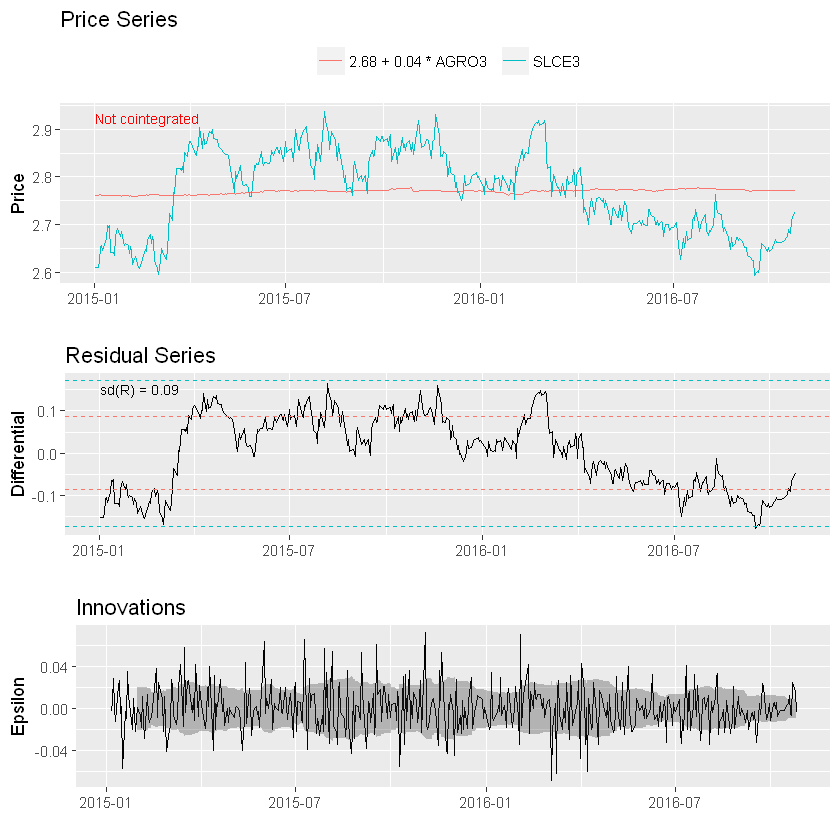

In [13]:
eg = egcm(dados$AGRO3,dados$SLCE3)
summary(eg)
plot(eg)

##### Testando para as demais: 

AGRO e BEEF, BEEF e BRFS, BEEF e MRFG, BRFS e JBSS 

In [37]:
print("AGRO3 e BEEF3")
egcm(dados$AGRO3,dados$BEEF3)
print("BEEF3 e BRFS3")
egcm(dados$BEEF3,dados$BRFS3)
print("BEEF3 e MRFG3")
egcm(dados$BEEF3,dados$MRFG3)
print("BRFS3 e JBSS3")
summary(egcm(dados$BRFS3,dados$JBSS3))

[1] "AGRO3 e BEEF3"


BEEF3[i] =   0.6028 AGRO3[i] +   0.9005 + R[i], R[i] =   0.9985 R[i-1] + eps[i], eps ~ N(0,  0.0230^2)
            (0.0513)            (0.1223)                (0.0083)

R[2016-10-25] = -0.0268 (t = -0.205)


[1] "BEEF3 e BRFS3"


BRFS3[i] =   0.0716 BEEF3[i] +   3.8913 + R[i], R[i] =   1.0000 R[i-1] + eps[i], eps ~ N(0,  0.0173^2)
            (0.0436)            (0.1022)                (0.0059)

R[2016-10-25] = -0.0933 (t = -0.678)


[1] "BEEF3 e MRFG3"


MRFG3[i] =   0.7762 BEEF3[i] -   0.0957 + R[i], R[i] =   0.9875 R[i-1] + eps[i], eps ~ N(0,  0.0235^2)
            (0.0325)            (0.0767)                (0.0108)

R[2016-10-25] = 0.0810 (t = 0.790)


[1] "BRFS3 e JBSS3"


JBSS3[i] =   1.1336 BRFS3[i] -   2.0721 + R[i], R[i] =   0.9499 R[i-1] + eps[i], eps ~ N(0,  0.0329^2)
            (0.0339)            (0.1388)                (0.0157)

R[2016-10-25] = 0.0452 (t = 0.455)


Unit Root Tests of Residuals
                                                    Statistic    p-value
  Augmented Dickey Fuller (ADF)                        -3.552    0.02514
  Phillips-Perron (PP)                                -23.234    0.03376
  Pantula, Gonzales-Farias and Fuller (PGFF)            0.948    0.04376
  Elliott, Rothenberg and Stock DF-GLS (ERSD)          -0.797    0.63415
  Johansen's Trace Test (JOT)                         -17.552    0.12256
  Schmidt and Phillips Rho (SPR)                       -3.163    0.90533

Variances
  SD(diff(BRFS3))      =   0.017676
  SD(diff(JBSS3))      =   0.033096
  SD(diff(residuals))  =   0.033510
  SD(residuals)        =   0.099265
  SD(innovations)      =   0.032934

Half life       =  13.477863
R[last]         =   0.045163 (t=0

Aparentemente BRFS3 e JBSS3 são cointegradas
<hr>

**(6) Divida a amostra em duas partes, e realize os mesmos testes acima para cada subamostra separadamente. Os resultados mudam?**

In [18]:
egcm(dados[0:225]$AGRO3,dados[0:225]$SLCE3)
egcm(dados[0:225]$AGRO3,dados[0:225]$BEEF3)
egcm(dados[0:225]$BEEF3,dados[0:225]$BRFS3)
egcm(dados[0:225]$BEEF3,dados[0:225]$MRFG3)
egcm(dados[0:225]$BRFS3,dados[0:225]$JBSS3)

SLCE3[i] =   0.4623 AGRO3[i] +   1.7341 + R[i], R[i] =   0.9561 R[i-1] + eps[i], eps ~ N(0,  0.0232^2)
            (0.0342)            (0.0800)                (0.0235)

R[2015-11-27] = 0.0208 (t = 0.317)


BEEF3[i] =   1.2806 AGRO3[i] -   0.6416 + R[i], R[i] =   0.9485 R[i-1] + eps[i], eps ~ N(0,  0.0295^2)
            (0.0408)            (0.0955)                (0.0251)

R[2015-11-27] = 0.0314 (t = 0.402)


BRFS3[i] =   0.1001 BEEF3[i] +   3.9460 + R[i], R[i] =   1.0000 R[i-1] + eps[i], eps ~ N(0,  0.0168^2)
            (0.0222)            (0.0523)                (0.0188)

R[2015-11-27] = -0.1695 (t = -2.805)


MRFG3[i] =   0.8569 BEEF3[i] -   0.3360 + R[i], R[i] =   0.9843 R[i-1] + eps[i], eps ~ N(0,  0.0273^2)
            (0.0352)            (0.0829)                (0.0190)

R[2015-11-27] = 0.0959 (t = 1.002)


JBSS3[i] =   0.8921 BRFS3[i] -   1.0589 + R[i], R[i] =   1.0000 R[i-1] + eps[i], eps ~ N(0,  0.0236^2)
            (0.1316)            (0.5502)                (0.0126)

R[2015-11-27] = 0.0724 (t = 0.583)


In [19]:
egcm(dados[225:nrow(dados)]$AGRO3,dados[225:nrow(dados)]$SLCE3)
egcm(dados[225:nrow(dados)]$AGRO3,dados[225:nrow(dados)]$BEEF3)
egcm(dados[225:nrow(dados)]$BEEF3,dados[225:nrow(dados)]$BRFS3)
egcm(dados[225:nrow(dados)]$BEEF3,dados[225:nrow(dados)]$MRFG3)
egcm(dados[225:nrow(dados)]$BRFS3,dados[225:nrow(dados)]$JBSS3)



SLCE3[i] =  -0.4929 AGRO3[i] +   3.9355 + R[i], R[i] =   0.9605 R[i-1] + eps[i], eps ~ N(0,  0.0209^2)
            (0.0556)            (0.1357)                (0.0232)

R[2016-10-25] = -0.0256 (t = -0.427)


BEEF3[i] =  -0.9742 AGRO3[i] +   4.7112 + R[i], R[i] =   0.9670 R[i-1] + eps[i], eps ~ N(0,  0.0272^2)
            (0.0732)            (0.1787)                (0.0229)

R[2016-10-25] = -0.0346 (t = -0.439)


BRFS3[i] =   0.2272 BEEF3[i] +   3.4067 + R[i], R[i] =   0.9966 R[i-1] + eps[i], eps ~ N(0,  0.0172^2)
            (0.0441)            (0.1037)                (0.0164)

R[2016-10-25] = 0.0292 (t = 0.420)


MRFG3[i] =   0.4318 BEEF3[i] +   0.7640 + R[i], R[i] =   0.9914 R[i-1] + eps[i], eps ~ N(0,  0.0186^2)
            (0.0434)            (0.1021)                (0.0180)

R[2016-10-25] = 0.0229 (t = 0.334)


JBSS3[i] =   1.1262 BRFS3[i] -   2.0470 + R[i], R[i] =   0.8248 R[i-1] + eps[i], eps ~ N(0,  0.0379^2)
            (0.0583)            (0.2304)                (0.0394)

R[2016-10-25] = 0.0492 (t = 0.765)

Sim, quando mudamos o tamanho da amostra, os resultados do teste para BEEF e JBSS na primeira metade da amostra mudam, no entanto na segunda metade, elas continuam a ser cointegradas <hr>

**(7) Realize os testes do item (5), desta vez usando a metodologia de Johansen. Compare os resultados com aqueles obtidos no item 5.**

 Valores Críticos do teste de Johansen: 
 

|        | 10%   | 5%    | 1%    |
|--------|-------|-------|-------|
| r <= 1 | 6.50  | 8.18  | 11.65 |
| r = 0  | 15.66 | 17.95 | 23.52 |

In [41]:
print("AGRO3 e SLCE3")
summary(ca.jo(cbind(dados$AGRO3,dados$SLCE3), type='trace'))
print("AGRO3 e BEEF3")
ca.jo(cbind(dados$AGRO3,dados$BEEF3), type='trace')
print("BEEF3 e MRFG3")
ca.jo(cbind(dados$BEEF3,dados$BRFS3), type='trace')
print("BRFS3 e JBSS3")
ca.jo(cbind(dados$BEEF3,dados$MRFG3), type='trace')
print("BRFS3 e JBSS3")
summary(ca.jo(cbind(dados$BRFS3,dados$JBSS3), type='trace'))

[1] "AGRO3 e SLCE3"



###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend 

Eigenvalues (lambda):
[1] 0.01934796 0.01032039

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 1 |  4.65  6.50  8.18 11.65
r = 0  | 13.40 15.66 17.95 23.52

Eigenvectors, normalised to first column:
(These are the cointegration relations)

         AGRO3.l2  SLCE3.l2
AGRO3.l2 1.000000  1.000000
SLCE3.l2 2.014548 -1.010244

Weights W:
(This is the loading matrix)

            AGRO3.l2    SLCE3.l2
AGRO3.d -0.002486487 -0.01142645
SLCE3.d -0.013310799  0.00215427


[1] "AGRO3 e BEEF3"



##################################################### 
# Johansen-Procedure Unit Root / Cointegration Test # 
##################################################### 

The value of the test statistic is: 3.2604 8.3313 


[1] "BEEF3 e MRFG3"



##################################################### 
# Johansen-Procedure Unit Root / Cointegration Test # 
##################################################### 

The value of the test statistic is: 4.3771 12.515 


[1] "BRFS3 e JBSS3"



##################################################### 
# Johansen-Procedure Unit Root / Cointegration Test # 
##################################################### 

The value of the test statistic is: 3.615 10.5579 


[1] "BRFS3 e JBSS3"



###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend 

Eigenvalues (lambda):
[1] 0.034214120 0.003770823

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 1 |  1.69  6.50  8.18 11.65
r = 0  | 17.29 15.66 17.95 23.52

Eigenvectors, normalised to first column:
(These are the cointegration relations)

           BRFS3.l2  JBSS3.l2
BRFS3.l2  1.0000000 1.0000000
JBSS3.l2 -0.7964346 0.3203387

Weights W:
(This is the loading matrix)

            BRFS3.l2     JBSS3.l2
BRFS3.d -0.002759101 -0.005660837
JBSS3.d  0.072506401 -0.003742185


Os restultados do teste de Johansen confirmam que há uma cointegração entre JBS e BRF.